# Data Analysis of Stock Market 
### Analysis of Volume and Close price for a company
Project for the Course: AE102- Data analysis and Interpretation

Project by: Patil Sayali Shashikant (200260036)           Uppala Mukesh (200260056)

## Stock information for a company
Stock information for a given day is crucial for investors, traders, analysts, and financial professionals to analyze historical trends, monitor market activity, make investment decisions, and evaluate the performance of specific stocks or companies.

It refers to the data and details related to a specific stock or company on a particular date. It typically includes various financial metrics, trading statistics, and other relevant information that provides insights into the stock's performance and market activity on that particular day.

Here are some the elements and their meanings in a dataset for a given stock:

1. __Stock Symbol__: A unique abbreviation or code representing a specific publicly traded company's stock. For example, "AMZN" represents Amazon.com, Inc. - Common Stock.

2. __Date__: The specific calendar date for which the stock information is retrieved. It represents the day on which the data pertains to.

3. __Open Price__: The price at which a stock begins trading on a given day.

4. __Close Price__: The price at which a stock ends trading on a given day. 

5. __High and Low Prices__: The highest and lowest prices at which a stock traded during a given day.

6. __Volume__: The total number of shares traded for a particular stock on a given day. It indicates the level of market activity and liquidity.

7. __Adjusted Close Price__: The closing price adjusted for events such as dividends, stock splits, or other corporate actions.

## Dataset 
We have obtained the data from https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset?resource=download.

We are utilizing a dataset comprising entries related to Amazon stocks as the foundation for our analysis. The dataset encompasses a comprehensive collection of historical stock data that allows us to gain insights into the historical trends, patterns, and performance of Amazon stocks over a significant period. By conducting an in-depth analysis, we aim to uncover valuable information about trend of key metrics - close stock prices for each day and trading volumes. This analysis will enable us to understand the dynamics of Amazon's stock market performance. 

First of all we import all the necessary libraries we will be needing to perform the analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy import stats
from sklearn import linear_model, model_selection, metrics  
%matplotlib inline

Using pandas we read the csv file and check the size of the dataset. Here we have the data for random variables - the closing price and Volume of stocks for a given date. 
Here `Close` column represents the Close price and `Volume` represents the Volume of Amazon stocks for a given date.

In [2]:
# Read data from the dataset AMZN.csv 
data = pd.read_csv('AMZN.csv')
print(data.shape)
data.head()

(5758, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,15-05-1997,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,16-05-1997,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,19-05-1997,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,20-05-1997,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,21-05-1997,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


## Data Description 
As our dataset is huge, we will find out
the basic parameters so as to gain a central idea about what values we are dealing with. These are -  Count for each random variable, Mean, Median, Variance, Standard Deviation, Minimum value, 25th, 50th and 75th percentile, and Maximum value.

In [3]:
Close = data['Close']
Volume = data['Volume']

# Basic parameters
Description = {
    'Parameter': ['Count', 'Mean', 'Variance', 'Median', 'Std deviation', 'Minimum', '25th percentile','50th percentile', '75th percentile', 'Maximum'],
    'Close': [len(Close), Close.mean(), Close.var(), Close.median(), Close.std(), Close.min(), np.percentile(Close, 25), np.percentile(Close, 50), np.percentile(Close, 75), Close.max()],
    'Volume': [len(Volume), round(Volume.mean()), round(Volume.var()), round(Volume.median()), round(Volume.std()), Volume.min(), round(np.percentile(Volume, 25)), round(np.percentile(Volume, 50)), round(np.percentile(Volume, 75)), Volume.max()]
}

# Create a DataFrame from the data dictionary
df = pd.DataFrame(Description)
print(df)

         Parameter          Close          Volume
0            Count    5758.000000            5758
1             Mean     340.417580         7556094
2         Variance  273675.676066  53668867530404
3           Median      81.599998         5692450
4    Std deviation     523.140207         7325904
5          Minimum       1.395833          487200
6  25th percentile      37.562500         3685525
7  50th percentile      81.599998         5692450
8  75th percentile     334.290001         8594350
9          Maximum    2170.219971       104329200


## Data Visualization for the dataset 

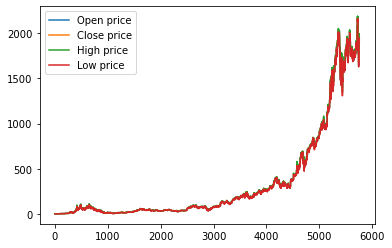

In [4]:
# For Open, Close, High, Low random variables
data_rows=len(data['Volume'])
plt.plot(range(data_rows),data['Open'],'-', label='Open price')
plt.plot(range(data_rows),data['Close'],'-', label='Close price')
plt.plot(range(data_rows),data['High'],'-', label='High price')
plt.plot(range(data_rows),data['Low'],'-', label='Low price')
plt.legend()
plt.show()

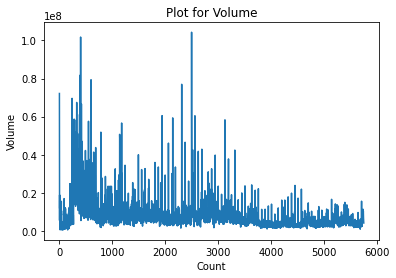

In [5]:
# For Volume random variable
plt.plot(range(len(Volume)),Volume,'-')
plt.xlabel('Count')
plt.ylabel('Volume')
plt.title('Plot for Volume')
plt.show()

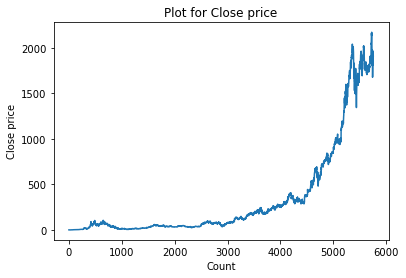

In [6]:
# For Close random variable
plt.plot(range(len(Close)),Close,'-')
plt.xlabel('Count')
plt.ylabel('Close price')
plt.title('Plot for Close price')
plt.show()

### Moving averages
Moving averages are commonly used in stock market analysis to identify trends and smooth out price fluctuations over a specified time period. We use Pandas `rolling()` function which allows to compute moving averages by specifying the window size, and plot the moving average alongside the stock volume and price data using matplotlib.

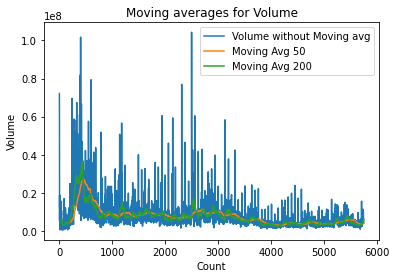

In [7]:
# Moving averages for Volume
MAV50 = data['Volume'].rolling(50).mean()
MAV200 = data['Volume'].rolling(200).mean()
plt.plot(range(len(Volume)), Volume, label='Volume without Moving avg')
plt.plot(range(len(Volume)), MAV200, label = 'Moving Avg 50')
plt.plot(range(len(Volume)), MAV50, label = 'Moving Avg 200')
plt.xlabel('Count')
plt.ylabel('Volume')
plt.title('Moving averages for Volume')
plt.legend()
plt.show()

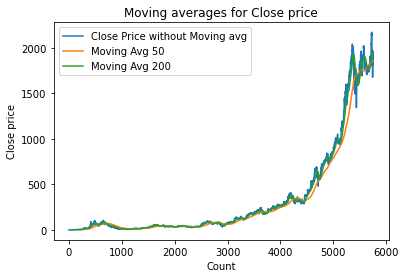

In [8]:
# Moving averages for Close price
MAC50 = data['Close'].rolling(50).mean()
MAC200 = data['Close'].rolling(200).mean()
plt.plot(range(len(Close)),Close, label='Close Price without Moving avg')
plt.plot(range(len(Close)),MAC200, label = 'Moving Avg 50')
plt.plot(range(len(Close)),MAC50, label = 'Moving Avg 200')
plt.xlabel('Count')
plt.ylabel('Close price')
plt.title('Moving averages for Close price')
plt.legend()
plt.show()

## Visualising the distributions of Random variables

### Volume:

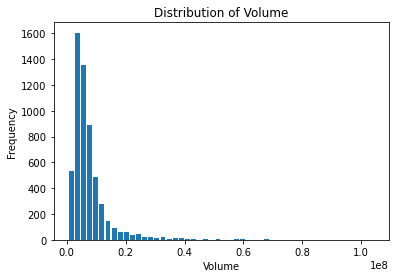

In [9]:
# Histogram representing Distribution of Volume 
plt.hist(Volume, bins=50,rwidth=0.8)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Volume')
plt.show()

C:\Users\SHASHIKANT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


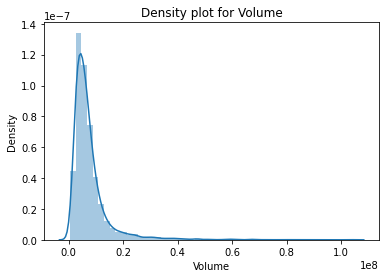

In [10]:
# Density plot representing distribution of density of Volume
sns.distplot(Volume)
plt.title('Density plot for Volume')
plt.show()

### Close Price:

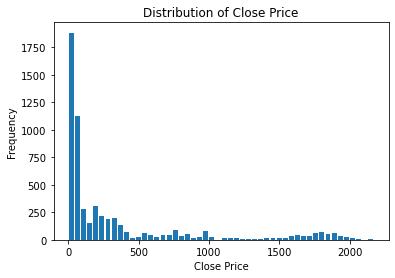

In [11]:
# Histogram representing Distribution of Close price 
plt.hist(Close, bins=50,rwidth=0.8)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Close Price')
plt.show()

C:\Users\SHASHIKANT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


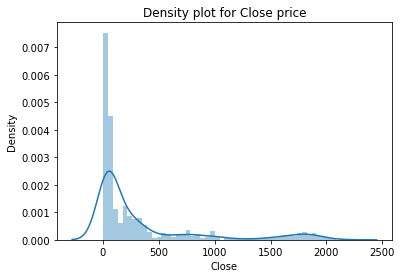

In [12]:
# Density plot representing distribution of density of Close price
sns.distplot(Close)
plt.title('Density plot for Close price')
plt.show()

### Joint distribution 
Joint distribution using `jointplot()` in Seaborn library provides a concise and informative way to visualize the relationship between two variables - Close price and Volume. By combining Linear regression fit and kernel density estimation plots with individual distribution plots, it gives a comprehensive view of the joint distribution and the marginal distributions simultaneously. They allow us to quickly identify patterns, trends, and correlations between the variables, aiding in the understanding of their relationship.

In the plot below, joint plot with a linear regression fit line is used for analyzing the relationship between Volume and Close price. It combines a scatter plot of the data points with a fitted line that represents the best-fit linear relationship, also called as regression line. 

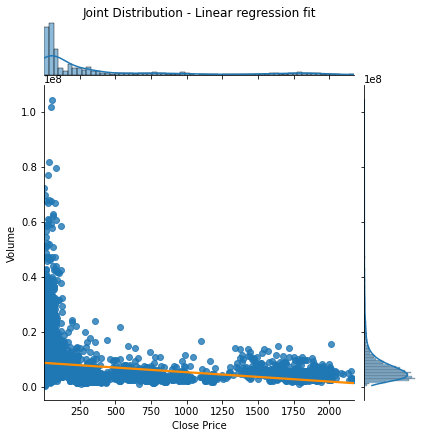

In [13]:
# Joint Distribution with Linear regression fit
sns.jointplot(data=data, x='Close', y='Volume',kind="reg",joint_kws={'line_kws':{'color':'darkorange'}})
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Joint Distribution - Linear regression fit',y=1.2)
plt.show()

In the joint plot below, the color intensity in given regions represents the density or number of data points in that specific area. A higher color intensity indicates a higher concentration of data points, while a lower intensity suggests a sparser distribution. This color-based representation provides visual cues about the density or frequency of observations in different regions.

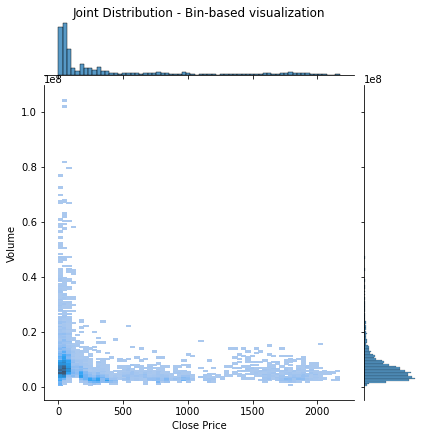

In [14]:
# Joint Distribution with Bin based visualization
sns.jointplot(data=data, x='Close', y='Volume', kind="hist")
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Joint Distribution - Bin-based visualization',y=1.2)
plt.show()

## Sampling Distributions
Collecting data from an entire population can be challenging and time-consuming, and even due to large size we may not be able to draw inferences very quickly. By working with a well-designed small samples that represents the population's characteristics, we can make valid inferences and generalize findings. Analyzing a sample dataset is more efficient, reducing computational requirements and facilitating data exploration. Sample data serves as the foundation for hypothesis testing, modeling, confidence intervals and various statistical techniques. For this we have considered 1000 Samples each of size 100.

Furthermore, we have implemented an ipywidget for each sampling distribution that enables us to manipulate and refine the number of samples, bins and sample sizes. It allows us to explore and fine-tune the parameters to generate sampling distributions for both the Volume and the Close price data. By adjusting the bin count and sample size, we can observe how the distributions change and gain insights into the mean and variance of the data.

### Sampling distribution of sample mean for Volume

In [15]:
# Sampling distribution of sample mean for Volume
Sample_mean_Volume = [] 
def SMV_widget(Samples=1000,bins=50,Sample_size=100):
    for i in range(Samples):
        Sample_data = data.sample(Sample_size,random_state=i)
        Sample_mean_Volume.append(Sample_data['Volume'].mean())
    plt.hist(Sample_mean_Volume, bins, rwidth=0.8)
    plt.xlabel('Sample mean for Volume')
    plt.ylabel('Frequency')
    plt.title('Sampling distribution of sample mean for Volume')
    plt.show()
widgets.interact(SMV_widget, Samples=(10,1500), bins=(10,100), Sample_size=(10,150))

interactive(children=(IntSlider(value=1000, description='Samples', max=1500, min=10), IntSlider(value=50, desc…

<function __main__.SMV_widget(Samples=1000, bins=50, Sample_size=100)>

C:\Users\SHASHIKANT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


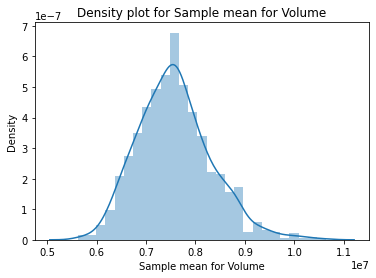

In [16]:
# Density plot for Sample mean for Volume
sns.distplot(Sample_mean_Volume)
plt.xlabel('Sample mean for Volume')
plt.title('Density plot for Sample mean for Volume')
plt.show()

### Sampling distribution of sample mean for Close Price

In [17]:
# Sampling distribution of sample mean for Close Price
Sample_mean_Close = []
def SMC_widget(Samples=1000,bins=50,Sample_size=100):     
    for i in range(Samples):
        Sample_data = data.sample(Sample_size,random_state=i)
        Sample_mean_Close.append(Sample_data['Close'].mean())
    plt.hist(Sample_mean_Close, bins, rwidth=0.8)
    plt.xlabel('Sample mean for Close Price')
    plt.ylabel('Frequency')
    plt.title('Sampling distribution of sample mean for Close Price')
    plt.show()
widgets.interact(SMC_widget, Samples=(10,1500), bins=(10,100), Sample_size=(10,150))

interactive(children=(IntSlider(value=1000, description='Samples', max=1500, min=10), IntSlider(value=50, desc…

<function __main__.SMC_widget(Samples=1000, bins=50, Sample_size=100)>

C:\Users\SHASHIKANT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


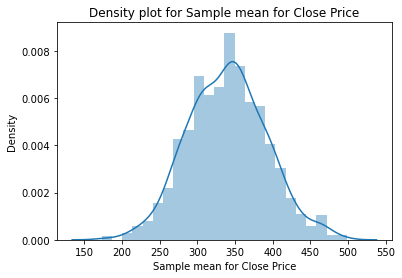

In [18]:
# Density plot for Sample mean for Close Price
sns.distplot(Sample_mean_Close)
plt.xlabel('Sample mean for Close Price')
plt.title('Density plot for Sample mean for Close Price')
plt.show()

### Sampling distribution of sample variance for Volume

In [19]:
# Sampling distribution of sample variance for Volume
Sample_var_Volume = [] 
def SVV_widget(Samples=1000,bins=50,Sample_size=100):
    for i in range(Samples):
        Sample_data = data.sample(Sample_size,random_state=i)
        Sample_var_Volume.append(Sample_data['Volume'].var())
    plt.hist(Sample_var_Volume, bins, rwidth=0.8)
    plt.xlabel('Sample variance for Volume')
    plt.ylabel('Frequency')
    plt.title('Sampling distribution of sample variance for Volume')
    plt.show()
widgets.interact(SVV_widget, Samples=(10,1500), bins=(10,100), Sample_size=(10,150))

interactive(children=(IntSlider(value=1000, description='Samples', max=1500, min=10), IntSlider(value=50, desc…

<function __main__.SVV_widget(Samples=1000, bins=50, Sample_size=100)>

C:\Users\SHASHIKANT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


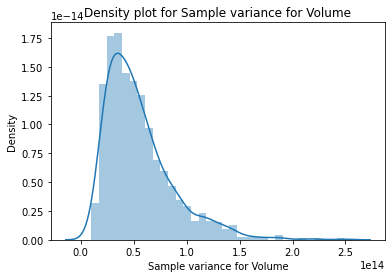

In [20]:
# Density plot for Sample variance for Volume
sns.distplot(Sample_var_Volume)
plt.xlabel('Sample variance for Volume')
plt.title('Density plot for Sample variance for Volume')
plt.show()

### Sampling distribution of sample variance for Close Price

In [21]:
#Sampling distribution of sample variance for Close Price
Sample_var_Close = [] 
def SVC_widget(Samples=1000,bins=50,Sample_size=100):
    for i in range(Samples):
        Sample_data = data.sample(Sample_size,random_state=i)
        Sample_var_Close.append(Sample_data['Close'].var())
    plt.hist(Sample_var_Close, bins, rwidth=0.8)
    plt.xlabel('Sample variance for Close Price')
    plt.ylabel('Frequency')
    plt.title('Sampling distribution of sample variance for Close Price')
    plt.show()
widgets.interact(SVC_widget, Samples=(10,1500), bins=(10,100), Sample_size=(10,150))

interactive(children=(IntSlider(value=1000, description='Samples', max=1500, min=10), IntSlider(value=50, desc…

<function __main__.SVC_widget(Samples=1000, bins=50, Sample_size=100)>

C:\Users\SHASHIKANT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


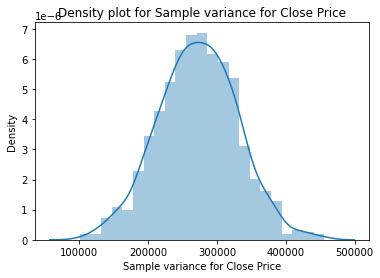

In [22]:
# Density plot for Sample variance for Close Price
sns.distplot(Sample_var_Close)
plt.xlabel('Sample variance for Close Price')
plt.title('Density plot for Sample variance for Close Price')
plt.show()

The plots presented above demonstrate that the sampling distribution of sample means exhibits a resemblance to the Gaussian (Normal) distribution, while the sampling distribution of sample variances resembles the chi-squared (χ^2) distribution. The observed similarity between the sampling distribution of sample means and the Gaussian distribution suggests that, as the sample size increases, the distribution of the sample means tends to become more symmetric and bell-shaped. On the other hand, the resemblance between the sampling distribution of sample variances and the χ^2 distribution indicates that the distribution of sample variances follows a specific shape characterized by the χ^2 distribution. These findings highlight the important role of sampling distributions in understanding the behavior and properties of sample statistics.

## Point Estimates 
We can use the sampling distribution to estimate the true parameters of our data - Mean and Variance.

### Point Estimates of Volume

In [23]:
Estimate_mean_Volume = np.mean(Sample_mean_Volume)
print(f'Estimate of Mean Volume = {Estimate_mean_Volume} \nTrue Mean Volume = {Volume.mean()}')

Estimate of Mean Volume = 7579078.908 
True Mean Volume = 7556093.938867662


In [24]:
Estimate_var_Volume = np.mean(Sample_var_Volume)
print(f'Estimate of Variance Volume = {Estimate_var_Volume} \nTrue Variance Volume = {Volume.var()}')

Estimate of Variance Volume = 55143599459213.46 
True Variance Volume = 53668867530404.43


### Point Estimates of Close price

In [25]:
Estimate_mean_Close = np.mean(Sample_mean_Close)
print(f'Estimate of Mean Close Price = {Estimate_mean_Close},\nTrue Mean Close Price = {Close.mean()}')

Estimate of Mean Close Price = 339.7078157729246,
True Mean Close Price = 340.4175803403024


In [26]:
Estimate_var_Close = np.mean(Sample_var_Close)
print(f'Estimate of Variance Close Price = {Estimate_var_Close} \nTrue Variance Close Price = {Close.var()}')

Estimate of Variance Close Price = 272299.4136617838 
True Variance Close Price = 273675.6760663098


Based on the aforementioned findings, it is evident that the point estimates of the mean and variance for both Volume and Close price are highly accurate given our chosen sample size. This accuracy is demonstrated by the fact that the estimated values closely align with the true values of the respective parameters. These results indicate that our sample, with its specific size, effectively captures the underlying population characteristics, allowing for reliable estimation of the mean and variance. The proximity between the estimated and true values underscores the precision of our point estimates and reinforces the validity of our sampling approach.

## Confidence Intervals
Confidence intervals are used to estimate population parameters with uncertainty. They provide a range of plausible values for the parameter, indicating the precision of the estimate. Confidence intervals address sampling variability and help interpret results more reliably. By considering both the estimated parameter value and the associated uncertainty, they offer a comprehensive understanding of the data. Overall, confidence intervals provide a measure of the precision and reliability of estimates.

We have implemented an ipywidget for each sampling distribution that enables us to manipulate and refine the sample sizes and level of confidence intervals. It allows us to explore and fine-tune the parameters to generate confidence intervals on sampling distributions for both the Volume and the Close price data. By adjusting the sample size and confidence interval levels, we can observe how the distributions change and gain insights into the confidence intervals for sample mean and sample variance of the data.

### Confidence Intervals for Sample Mean of Volume

In [27]:
# Sampling distribution and Confidence Intervals for Sample Mean of Volume
samples= 1000
bins= 50
sample_size= 100
        
def CI_volume_mean(sample_size=100, confidence= 0.95):
    sample_mean_volume= []
    sample_volume=[]
    for i in range(samples):
        sample_data= data.sample(sample_size, random_state=i)
        sample_mean_volume.append(sample_data['Volume'].mean())
        sample_volume.append(sample_data['Volume'])
    sample_mean= np.mean(sample_volume)
    sample_std= np.std(sample_volume)
    z= stats.norm.ppf(1-(1-confidence)/2)
    ci_lo= sample_mean - z*sample_std/np.sqrt(sample_size)
    ci_hi= sample_mean + z*sample_std/np.sqrt(sample_size)
    true_mean_volume= Volume.mean()
    
    plt.hist(sample_mean_volume, bins, rwidth=0.8)  
    plt.axvline(x= true_mean_volume, color='r')
    plt.axvline(x= ci_lo, color='g')
    plt.axvline(x= ci_hi, color='y')
    plt.xlabel('Sample Mean of Volume')
    plt.ylabel('Frequency')
    plt.title('Sampling distribution and Confidence Intervals for Sample mean of Volume')
    plt.show()
widgets.interact(CI_volume_mean, sample_size=(10,200), confidence=(0.1,1,0.01))

interactive(children=(IntSlider(value=100, description='sample_size', max=200, min=10), FloatSlider(value=0.95…

<function __main__.CI_volume_mean(sample_size=100, confidence=0.95)>

### Confidence Intervals for Sample Mean of Close price

In [28]:
# Sampling distribution and Confidence Intervals for Sample mean of Close Price
samples= 1000
bins= 50
sample_size= 100
        
def CI_close_mean(sample_size=100, confidence= 0.95):
    sample_mean_close= []
    sample_close=[]
    for i in range(samples):
        sample_data= data.sample(sample_size, random_state=i)
        sample_mean_close.append(sample_data['Close'].mean())
        sample_close.append(sample_data['Close'])
    sample_mean= np.mean(sample_close)
    sample_std= np.std(sample_close)
    z= stats.norm.ppf(1-(1-confidence)/2)
    ci_lo= sample_mean - z*sample_std/np.sqrt(sample_size)
    ci_hi= sample_mean + z*sample_std/np.sqrt(sample_size)
    true_mean_close = Close.mean()
    
    plt.hist(sample_mean_close, bins, rwidth=0.8)  
    plt.axvline(x= true_mean_close, color='r')
    plt.axvline(x= ci_lo, color='g')
    plt.axvline(x= ci_hi, color='y')
    plt.xlabel('Sample Mean of Close price')
    plt.ylabel('Frequency')
    plt.title('Sampling distribution and Confidence Intervals for Sample mean of Close Price')
    plt.show()
widgets.interact(CI_close_mean, sample_size=(10,200), confidence=(0.1,1,0.01))

interactive(children=(IntSlider(value=100, description='sample_size', max=200, min=10), FloatSlider(value=0.95…

<function __main__.CI_close_mean(sample_size=100, confidence=0.95)>

### Confidence Intervals for Sample Variance of Volume

In [29]:
# Sampling distribution and Confidence Intervals for Sample Variance of Volume
samples= 1000
bins= 50
sample_size= 100
    
def CI_volume_var(sample_size=100, confidence=0.95):
    sample_var_volume= []
    sample_volume=[]
    for i in range(samples):
        sample_data= data.sample(sample_size, random_state=i)
        sample_var_volume.append(sample_data['Volume'].var())
        sample_volume.append(sample_data['Volume'])
    n = len(sample_volume)
    dof = n - 1
    sample_variance = np.var(sample_volume, ddof=1)
    chi2_lower = stats.chi2.ppf(confidence/2, dof)
    chi2_upper = stats.chi2.ppf(1 - confidence/2, dof)
    ci_lo = (dof * sample_variance) / chi2_upper
    ci_hi = (dof * sample_variance) / chi2_lower
    true_var_volume= Volume.var()
    
    plt.hist(sample_var_volume, bins, rwidth=0.8)
    plt.axvline(x= true_var_volume, color='r')
    plt.axvline(x= ci_lo, color='g')
    plt.axvline(x= ci_hi, color='y')
    plt.xlabel('Sample Variance of Volume')
    plt.ylabel('Frequency')
    plt.title('Sampling distribution and Confidence Intervals for Sample Variance of Volume')
    plt.show()
widgets.interact(CI_volume_var, sample_size=(10,200), confidence=(0.1,1,0.01))

interactive(children=(IntSlider(value=100, description='sample_size', max=200, min=10), FloatSlider(value=0.95…

<function __main__.CI_volume_var(sample_size=100, confidence=0.95)>

### Confidence Intervals for Sample Variance of Close price

In [30]:
# Sampling distribution and Confidence Intervals for Sample Variance of Close price
samples= 1000
bins= 50
sample_size= 100
    
def CI_close_var(sample_size=100, confidence=0.95):
    sample_var_close= []
    sample_close=[]
    for i in range(samples):
        sample_data= data.sample(sample_size, random_state=i)
        sample_var_close.append(sample_data['Close'].var())
        sample_close.append(sample_data['Close'])
    n = len(sample_close)
    dof = n - 1
    sample_variance = np.var(sample_close, ddof=1)
    chi2_lower = stats.chi2.ppf(confidence/2, dof)
    chi2_upper = stats.chi2.ppf(1 - confidence/2, dof)
    ci_lo = (dof * sample_variance) / chi2_upper
    ci_hi = (dof * sample_variance) / chi2_lower
    true_var_close= Close.var()
    
    plt.hist(sample_var_close, bins, rwidth=0.8)
    plt.axvline(x= true_var_close, color='r')
    plt.axvline(x= ci_lo, color='g')
    plt.axvline(x= ci_hi, color='y')
    plt.xlabel('Sample Variance of Close price')
    plt.ylabel('Frequency')
    plt.title('Sampling distribution and Confidence Intervals for Sample Variance of Close price')
    plt.show()
widgets.interact(CI_close_var, sample_size=(10,200), confidence=(0.1,1,0.01))

interactive(children=(IntSlider(value=100, description='sample_size', max=200, min=10), FloatSlider(value=0.95…

<function __main__.CI_close_var(sample_size=100, confidence=0.95)>

From above plots and looking at different values by ipywidget for each sampling distribution and confidence interval values, we can confidently conclude that our sampling distribution has effectively estimated the point parameters and produced reliable confidence intervals. The results indicate that our sampling approach has accurately captured the characteristics of the population and provided proper estimates for confident intervals.

## Linear Regression

Linear regression is utilized to model the relationship between variables, analyze the impact of independent variables on the dependent variable, and make predictions or forecasts. Here we would consider the Close price as independent variable and Volume as dependent variable, i.e. we are trying to find the dependence between Close price and Volume, and if they are linearly dependent. 

We would first train the model and then predict the values of Volume to plot the regression line.

In [31]:
X = data[['Close']].values
Y = data['Volume'].values

In [32]:
X_train, X_test , Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
reg = linear_model.LinearRegression()

In [34]:
# Fitting the train data
reg_Fit = reg.fit(X_train, Y_train)

In [35]:
# Predicting values of Volume
reg_Y_pred = reg.predict(X_test)
print(reg_Y_pred)

[8216416.38676051 6846697.62672142 8064221.65967796 ... 8552786.21127819
 1836359.40012892 8561316.45605509]


In [36]:
# y-intercept of the regression line
reg.intercept_

8671812.15958479

In [37]:
# slope of the regression line
reg.coef_

array([-3395.68839599])

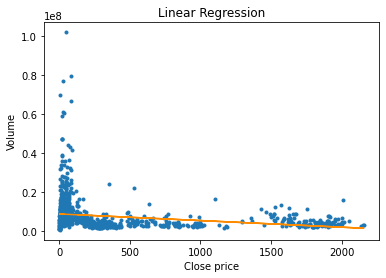

In [38]:
# Plot Regression line
plt.plot(X_test,Y_test,'.')
plt.plot(X_test,reg_Y_pred,'-',color='darkorange')
plt.xlabel("Close price")
plt.ylabel("Volume")
plt.title("Linear Regression")
plt.show()

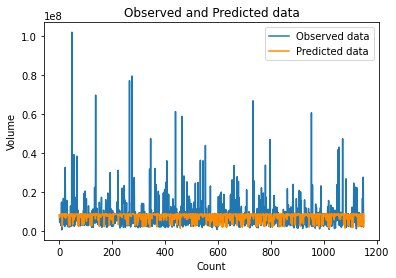

In [39]:
# Plotting Predicted data over Observed data
plt.plot(range(len(X_test)),Y_test,'-', label='Observed data')
plt.plot(range(len(X_test)),reg_Y_pred,'-',color='darkorange', label='Predicted data')
plt.legend()
plt.xlabel('Count')
plt.ylabel('Volume')
plt.title('Observed and Predicted data')
plt.show()

The R-squared value, also known as the coefficient of determination, quantifies the proportion of variance in the dependent variable explained by the independent variables, serving as a measure of model fit. The R-squared value helps evaluate the goodness of fit and determine how well the model explains the variation in the data. Higher R-squared values suggest a better fit of the regression model to the data.

In [40]:
# R-squared value
r2_reg = metrics.r2_score(Y_test,reg_Y_pred)
print(r2_reg)

0.045949350571784064


Mean Squared Error measures the average squared distance between the predicted and actual values. It provides a measure of how well the model fits the data. MSE is sensitive to outliers as it squares the differences, penalizing larger errors more heavily. In regression, minimizing the MSE is the objective when fitting a model. By minimizing the MSE, the model aims to reduce the overall discrepancy between the predicted and actual values and improve the accuracy of predictions.

In [41]:
mean2_reg = metrics.mean_squared_error(Y_test,reg_Y_pred)
print(mean2_reg)

63999765434375.89


Based on the obtained results, it is evident that the R-squared value is approximately 0.046. Additionally, the Mean Squared Error is extremely high, around 6.4e+13. Both of them indicating a very low level of correlation. These metrics collectively indicate a weak linear correlation between the random variables.

## Hypothesis Testing

### Correlation coefficient

The sample correlation coefficient (r), also known as Pearson's correlation coefficient, measures the strength and direction of the linear relationship between two variables in a sample. It quantifies how closely the data points in the sample align along a straight line.

A positive r (r > 0) indicates variables moving in the same direction. 

A negative r (r < 0) suggests variables moving in opposite directions. 

r = 0 implies no linear relationship between the variables.

In [42]:
# Correlation coefficient and p-value
r,p_value =stats.pearsonr(Close, Volume)
print(f'Correlation coefficient = {r}')
print(f'p-value = {p_value}')

Correlation coefficient = -0.2423170302085971
p-value = 1.0053891853818074e-77


For our data, we get negative correlation coefficient (r ~ -0.24, r < 0) which indicates a negative linear relationship, where an increase in one variable tends to be associated with a decrease in the other variable. In this case, the variables move in opposite directions. We can see this from the linear regression line too.

In [43]:
Corr_analysis = {
    ' ': ['Avg Close', 'Avg Volume'],
    'Avg Close': [1,r],
    'Avg Volume': [r,1]
}
df_corr = pd.DataFrame(Corr_analysis)
print(df_corr)

               Avg Close  Avg Volume
0   Avg Close   1.000000   -0.242317
1  Avg Volume  -0.242317    1.000000


Hypothesis testing is a crucial statistical procedure used to assess claims and draw conclusions based on sample data. It involves formulating a null hypothesis and an alternative hypothesis, representing the default assumption and an alternative viewpoint, respectively. 


The population correlation coefficient ρ, is a statistical measure that quantifies the strength and direction of the linear relationship between two variables in the entire population.

#### Null Hypothesis (H<sub>0</sub>): 
ρ = 0. It states that there __IS NO__ sufficient evidence to support the presence of a significant linear relationship (correlation) between the variables "Close" and "Volume" in the population. 

#### Alternative Hypothesis (H<sub>1</sub>): 
ρ ≠ 0. It states that there __IS__ sufficient evidence to support the presence of a significant __linear relationship (correlation)__ between the variables "Close" and "Volume" in the population. 

### Comparing p-value with the significance level of 5% to decide between H<sub>0</sub> and H<sub>1</sub>
We have to set a boundary to tell if we should accept or reject the null hypothesis. We will take the level of significance(α) as 5%.

__Case I__: If p_value is less than the significance level. i.e. p_value < alpha:

__Decision__: We reject the null hypothesis.

__Conclusion__: There is sufficient evidence to support the presence of a significant linear relationship (correlation) between the variables "Close" and "Volume" as population correlation coefficient ρ ≠ 0 and |r| > 0.

__Case II__: 
If p_value is greater than or equal to the significance level. i.e. p_value >= alpha:

__Decision__: We fail to reject the null hypothesis.

__Conclusion__:There is insufficient evidence to support the presence of a significant linear relationship (correlation) between the variables "Close" and "Volume" as population correlation coefficient ρ = 0.

In [44]:
# comparing alpha and p-value
alpha = 0.05
if p_value >= alpha:
    print(f'We fail to reject the null hypothesis. \np-value ({p_value}) >= alpha ({alpha})')
elif p_value < alpha:
    print(f'We reject the null hypothesis. \np-value ({p_value}) < alpha ({alpha})')

We reject the null hypothesis. 
p-value (1.0053891853818074e-77) < alpha (0.05)


From the above results, we see that for our case p_value < alpha so we therefore reject the null hypothesis. Hence, there is sufficient evidence to support the presence of a significant linear relationship (correlation) between the variables "Close" and "Volume". 

## Conclusion:
In our analysis of the Amazon stocks dataset, we conducted various data visualizations to gain insights into the distributions and patterns within the data. Through visualizations such as histograms and plots, we explored the characteristics and trends present in the dataset.

Additionally, we performed linear regression to examine the relationship between two variables of interest - Close price and Volume. This involved fitting a best-fit line to the data and assessing whether the variables exhibited a linear association. To evaluate the significance of the relationship, we employed hypothesis testing techniques.

By conducting hypothesis tests, we aimed to determine if the observed relationship between the variables was statistically significant or if it could have occurred by chance alone. This allowed us to make informed conclusions about the presence of a linear relationship between the variables.

Overall, our analysis combined data visualization techniques with statistical methods, enabling us to explore the distributions, assess linear relationships, and draw meaningful insights from the Amazon stocks dataset.